<a href="https://www.kaggle.com/code/notsau/simple-clustering-example?scriptVersionId=161427881" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#pembe hataları kaldırmak için
from sklearn.cluster import KMeans
#kmeans= en yakın komşu metodu
from sklearn.metrics import silhouette_score
#başarı oranını belirleten model
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df=pd.read_csv("/kaggle/input/airlines-traffic-passenger-statistics/Air_Traffic_Passenger_Statistics.csv")

# EDA

In [3]:
df.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        15007 non-null  int64 
 1   Activity Period              15007 non-null  int64 
 2   Operating Airline            15007 non-null  object
 3   Operating Airline IATA Code  14953 non-null  object
 4   Published Airline            15007 non-null  object
 5   Published Airline IATA Code  14953 non-null  object
 6   GEO Summary                  15007 non-null  object
 7   GEO Region                   15007 non-null  object
 8   Activity Type Code           15007 non-null  object
 9   Price Category Code          15007 non-null  object
 10  Terminal                     15007 non-null  object
 11  Boarding Area                15007 non-null  object
 12  Passenger Count              15007 non-null  int64 
 13  Adjusted Activity Type Code  15

In [5]:
df.isnull().sum()

index                           0
Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [6]:
df["Boarding Area"].unique()

array(['B', 'G', 'A', 'E', 'C', 'F', 'Other', 'D'], dtype=object)

In [7]:
x=df[["Price Category Code","GEO Summary","Passenger Count"]]

In [8]:
x = pd.get_dummies(x)

# Modelling

In [9]:
wcss=[]
for i in range(1,10):
#2den başlayıp 10 gruba kadar ayırtcaz ve hangi gruplamanın uygun olduğuna bakacağız (neden 2?; çünkü 1 grup anlamsız)
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

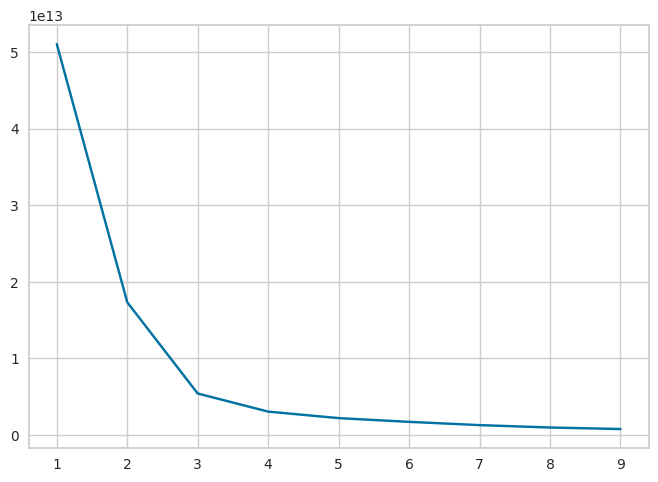

In [10]:
plt.plot(range(1,10),wcss)
#dirsek grafiğini çizdik
#3'te kırılmış gibi gözüküyor

In [11]:
km=KMeans()

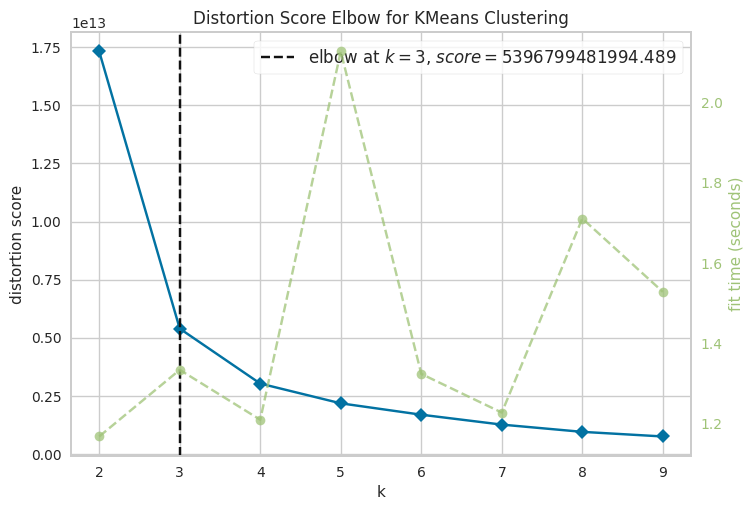

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()
#yukarda 3 grup sanki dirsekdeymiş gibi gözüküyodu ve 3'müş

In [13]:
model=KMeans(4)
#kmeans'ı kullanarak modeli 3 gruba ayırmak istiyoruz

In [14]:
model=model.fit(x)
#sadece x'le modeli eğitiyoruz

In [15]:
tahmin=model.predict(x)
#arabayı benzerliklerine göre 3 farklı sütuna ayırdı (tahmin etti)

In [16]:
x["Cluster"]=tahmin
#x'e yeni bi sütun açıp tahmin ettiğimiz verileri sütuna ekledik

In [17]:
x.head()

,Passenger Count,Price Category Code_Low Fare,Price Category Code_Other,GEO Summary_Domestic,GEO Summary_International,Cluster
0,27271,True,False,True,False,3
1,29131,True,False,True,False,3
2,5415,True,False,True,False,3
3,35156,False,True,False,True,0
4,34090,False,True,False,True,0
